Documentation for this dataset may be found at: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [3]:
import pandas as pd


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
df.to_csv("ames_housing.csv", index = False)

In [71]:
!pip install skimpy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bamboolib 1.30.19 requires pandas<2.0.0,>=1.1.0, but you have pandas 2.1.1 which is incompatible.
ppscore 1.3.0 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.1.1 which is incompatible.



  Obtaining dependency information for pandas<3.0.0,>=2.0.3 from https://files.pythonhosted.org/packages/2d/5e/9213ea10ac473e2437dc2cb17323ddc0999997e2713d6a0b683b10773994/pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata (18 kB)
Using cached pandas-2.1.1-cp311-cp311-win_amd64.whl (10.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


In [72]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2930   │ │ int32       │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %  ┃ mean     ┃ sd     ┃ p0     ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Overall Qual   │   0 │     0 │      6.1 │    1.4 │      1 │       5 │       6 │       7 │      10 │   ▇▆▇▁ │  │
│ │ SalePrice      │   0 │     0 │   180000 │  80000 │  13000 │  130000 │  160000 │  210000 │  760000 │  ▅▇▁   │  │
│ └────────────────┴─────┴───────┴──────────┴────────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [73]:
!pip install summarytools
from summarytools import dfSummary

In [76]:
 dfSummary(df)

AttributeError: 'DataFrame' object has no attribute 'map'

In [75]:
!pip install bamboolib
import bamboolib as bam
bam.enable()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skimpy 0.0.11 requires pandas<3.0.0,>=2.0.3, but you have pandas 1.5.3 which is incompatible.


  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1


ContextualVersionConflict: (ipywidgets 8.0.4 (c:\users\billy ke\anaconda3\lib\site-packages), Requirement.parse('ipywidgets<8.0.0,>=7.6.0'), {'bamboolib'})

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Data preprocessing
# Convert 'Central Air' to numerical values (1 for 'Y', 0 for 'N')
df['Central Air'] = df['Central Air'].apply(lambda x: 1 if x == 'Y' else 0)

In [26]:
# Handle missing values (replace with mean for simplicity)
df.fillna(df.mean(), inplace=True)

In [27]:
# Define features (X) and target (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [28]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [30]:
# KNN regression for different values of K
mse_train = []
mse_test = []
k_values = range(1, 10)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))



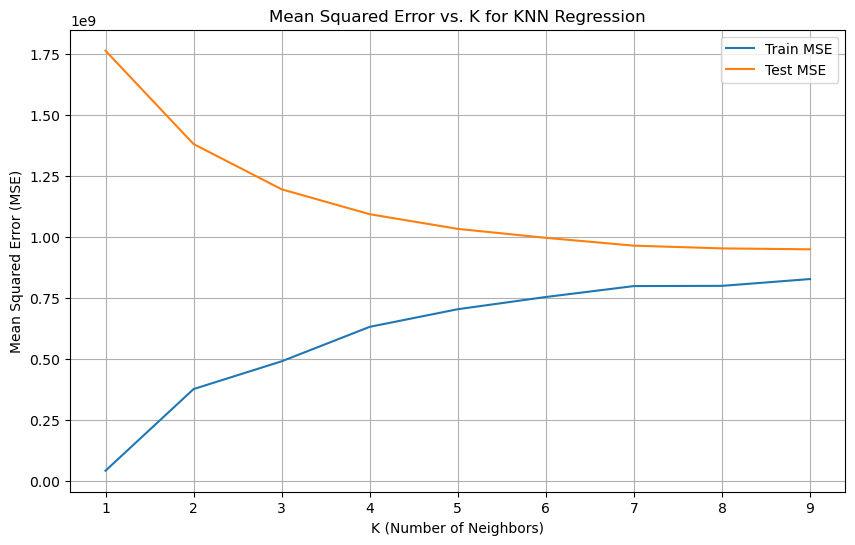

In [31]:
# Plotting MSE for different values of K
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_train, label='Train MSE')
plt.plot(k_values, mse_test, label='Test MSE')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. K for KNN Regression')
plt.legend()
plt.grid(True)
plt.show()



In [32]:
# Choose the optimal K (minimize test MSE)
optimal_k = k_values[np.argmin(mse_test)]



In [33]:
# Display metrics for the optimal K
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_train_optimal = knn_optimal.predict(X_train)
y_pred_test_optimal = knn_optimal.predict(X_test)

train_mse_optimal = mean_squared_error(y_train, y_pred_train_optimal)
test_mse_optimal = mean_squared_error(y_test, y_pred_test_optimal)
train_r2_optimal = r2_score(y_train, y_pred_train_optimal)
test_r2_optimal = r2_score(y_test, y_pred_test_optimal)

print('Optimal K:', optimal_k)
print('Train MSE:', train_mse_optimal)
print('Test MSE:', test_mse_optimal)
print('Train R-squared:', train_r2_optimal)
print('Test R-squared:', test_r2_optimal)

Optimal K: 9
Train MSE: 828828063.3627259
Test MSE: 950748572.3268164
Train R-squared: 0.8638089691196541
Test R-squared: 0.8647473758901378


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [35]:
# Handle missing values 
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [36]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [37]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_train_linear = linear_reg.predict(X_train)
y_pred_test_linear = linear_reg.predict(X_test)


In [38]:
# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_train_lasso = lasso_reg.predict(X_train)
y_pred_test_lasso = lasso_reg.predict(X_test)


In [39]:
# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_train_ridge = ridge_reg.predict(X_train)
y_pred_test_ridge = ridge_reg.predict(X_test)


In [40]:
# Computing MSE and R-squared for each model
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

In [56]:
train_mse_linear, train_r2_linear = calculate_metrics(y_train, y_pred_train_linear)
test_mse_linear, test_r2_linear = calculate_metrics(y_test, y_pred_test_linear)

train_mse_lasso, train_r2_lasso = calculate_metrics(y_train, y_pred_train_lasso)
test_mse_lasso, test_r2_lasso = calculate_metrics(y_test, y_pred_test_lasso)

train_mse_ridge, train_r2_ridge = calculate_metrics(y_train, y_pred_train_ridge)
test_mse_ridge, test_r2_ridge = calculate_metrics(y_test, y_pred_test_ridge)

In [57]:
print('Linear Regression:')
print('Train MSE:', train_mse_linear)
print('Train R-squared:', train_r2_linear)
print('Test MSE:', test_mse_linear)
print('Test R-squared:', test_r2_linear)

print('\nLasso Regression:')
print('Train MSE:', train_mse_lasso)
print('Train R-squared:', train_r2_lasso)
print('Test MSE:', test_mse_lasso)
print('Test R-squared:', test_r2_lasso)

print('\nRidge Regression:')
print('Train MSE:', train_mse_ridge)
print('Train R-squared:', train_r2_ridge)
print('Test MSE:', test_mse_ridge)
print('Test R-squared:', test_r2_ridge)

Linear Regression:
Train MSE: 1509148398.3408568
Train R-squared: 0.7520203704401891
Test MSE: 1504823279.6176674
Test R-squared: 0.7859252137588957

Lasso Regression:
Train MSE: 1509148401.5959206
Train R-squared: 0.7520203699053248
Test MSE: 1504836371.2496274
Test R-squared: 0.7859233513552824

Ridge Regression:
Train MSE: 1509148792.239572
Train R-squared: 0.752020305715701
Test MSE: 1505006843.1119487
Test R-squared: 0.7858991001837455


### The case below shows a linear relationship between overall quality of the house and sale price

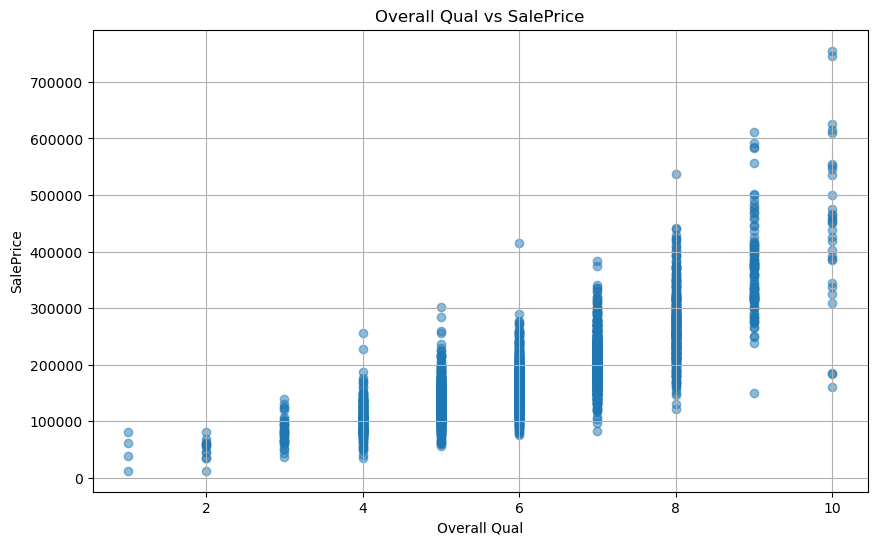

In [52]:
# Load the data
columns = ['Overall Qual', 'SalePrice']
url = 'http://jse.amstat.org/v19n3/decock/AmesHousing.txt'
df = pd.read_csv(url, sep='\t', usecols=columns)

# Plotting "Overall Qual" vs "SalePrice"
plt.figure(figsize=(10, 6))
plt.scatter(df['Overall Qual'], df['SalePrice'], alpha=0.5)
plt.xlabel('Overall Qual')
plt.ylabel('SalePrice')
plt.title('Overall Qual vs SalePrice')
plt.grid(True)
plt.show()

In [53]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Extend features by including polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

# Split the extended data into training and testing sets (70% train, 30% test)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)



In [54]:
# Linear Regression with polynomial features
linear_reg_poly = LinearRegression()
linear_reg_poly.fit(X_poly_train, y_train)
y_pred_train_poly = linear_reg_poly.predict(X_poly_train)
y_pred_test_poly = linear_reg_poly.predict(X_poly_test)

# Lasso Regression with polynomial features
lasso_reg_poly = Lasso()
lasso_reg_poly.fit(X_poly_train, y_train)
y_pred_train_lasso_poly = lasso_reg_poly.predict(X_poly_train)
y_pred_test_lasso_poly = lasso_reg_poly.predict(X_poly_test)

# Ridge Regression with polynomial features
ridge_reg_poly = Ridge()
ridge_reg_poly.fit(X_poly_train, y_train)
y_pred_train_ridge_poly = ridge_reg_poly.predict(X_poly_train)
y_pred_test_ridge_poly = ridge_reg_poly.predict(X_poly_test)



C:\Users\Billy KE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.092e+11, tolerance: 1.248e+09
  model = cd_fast.enet_coordinate_descent(


In [55]:
# Computing MSE and R-squared for each model with polynomial features
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

train_mse_poly, train_r2_poly = calculate_metrics(y_train, y_pred_train_poly)
test_mse_poly, test_r2_poly = calculate_metrics(y_test, y_pred_test_poly)

train_mse_lasso_poly, train_r2_lasso_poly = calculate_metrics(y_train, y_pred_train_lasso_poly)
test_mse_lasso_poly, test_r2_lasso_poly = calculate_metrics(y_test, y_pred_test_lasso_poly)

train_mse_ridge_poly, train_r2_ridge_poly = calculate_metrics(y_train, y_pred_train_ridge_poly)
test_mse_ridge_poly, test_r2_ridge_poly = calculate_metrics(y_test, y_pred_test_ridge_poly)

print('Linear Regression with Polynomial Features (degree=3):')
print('Train MSE:', train_mse_poly)
print('Train R-squared:', train_r2_poly)
print('Test MSE:', test_mse_poly)
print('Test R-squared:', test_r2_poly)

print('\nLasso Regression with Polynomial Features (degree=3):')
print('Train MSE:', train_mse_lasso_poly)
print('Train R-squared:', train_r2_lasso_poly)
print('Test MSE:', test_mse_lasso_poly)
print('Test R-squared:', test_r2_lasso_poly)

print('\nRidge Regression with Polynomial Features (degree=3):')
print('Train MSE:', train_mse_ridge_poly)
print('Train R-squared:', train_r2_ridge_poly)
print('Test MSE:', test_mse_ridge_poly)
print('Test R-squared:', test_r2_ridge_poly)

Linear Regression with Polynomial Features (degree=3):
Train MSE: 790688616.7030267
Train R-squared: 0.8700759511239992
Test MSE: 1062838245.6542048
Test R-squared: 0.8488016012716774

Lasso Regression with Polynomial Features (degree=3):
Train MSE: 790916307.172803
Train R-squared: 0.8700385375744691
Test MSE: 1066942327.8659607
Test R-squared: 0.8482177582822064

Ridge Regression with Polynomial Features (degree=3):
Train MSE: 790690941.070909
Train R-squared: 0.8700755691894677
Test MSE: 1062651893.569004
Test R-squared: 0.8488281115492264


### Did the Performance improve
Yes.
Extending the feature set with polynomial features of degree 3 
improved performance in all the regression ie. linear, Lasso, and Ridge regressions.
These models better captured complex relationships in the data with the features extendend,
resulting in reduced Mean Squared Error (MSE) and increased R-squared values, 
showing a significant improvement predictive accuracy for the housing dataset hence improvement in the perfomance.